In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)

names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

df.columns=names

Missing data is replaced by mode of the column

In [ ]:
list0=[]
for column in df.columns:
    try:
        data= df[df[column]==' ?']
        if data.shape[0]>0:
            list0.append(column)
            
    except:
        continue;

for i in list0:
    s=pd.Series(df[i])
    s.replace(' ?',s.mode()[0], inplace=True)

Taking only Numerical data

In [ ]:
df1=df[df._get_numeric_data().columns]
df1['salary']=df['salary']

Training and testing data split 5 times, so each row of original data is once in test data prediction of each test data ouput combined according to test_index and compared with output of original data output values for accuracy

Data is scaled so each attribute has significant contribution in finding distances between test instance and k nearest neighbours

Nearest k neighbour's output is considered and the majority's output is predicted output of this test instance given by knn.predict

Algorithm is run for 181 values of k i.e square root of number of instances/rows of training data

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

from sklearn.preprocessing import StandardScaler

acc=[]

for i in range(1,181):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=i)

    results=pd.Series()

    for train_index, test_index in kf.split(df1):
        X_Train, X_test, y_train, ytest = df1.drop(columns='salary').iloc[train_index], df1.drop(columns='salary').iloc[test_index], df1['salary'].iloc[train_index], df1['salary'].iloc[test_index]

        scaler = StandardScaler()

        X_Train=scaler.fit_transform(X_Train)
        X_test=scaler.transform(X_test)

        knn.fit(X_Train, y_train)

        y_pred = knn.predict(X_test)

        indexes=list(test_index)
    
        res=pd.Series(y_pred,index=indexes)
        results=results.append(res)
    
    results=results.sort_index()    
    
    from sklearn import metrics
    print("Accuracy:",(metrics.accuracy_score(df1['salary'], results))*100,'%')
    
    acc.append(metrics.accuracy_score(df1['salary'], results))
    
print('Accuracy:',(max(acc))*100,'%','k=',acc.index(max(acc)))    

Co-relation of K value and accuracy of KNN model for given K value plotted 

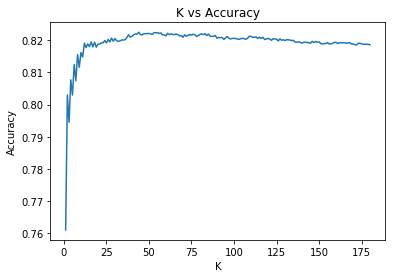

In [53]:
import matplotlib.pyplot as plt

plt.plot(K,acc)
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

Sactter plot of K value and KNN accuracy for the K value

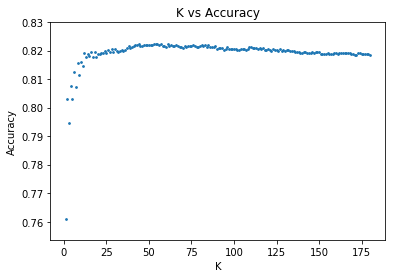

In [69]:
plt.scatter(K, acc, s=3)
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
plt.show()